In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [6]:
X = data.data
y = data.target
# 说明有 569 个样本，每个样本 30 个特征。
# 矩阵
# 为什么是这个形状🤔
print(X.shape)
# 569 个样本, 569个结果
print(y.shape)

(569, 30)
(569,)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression 是在用 sigmoid 函数拟合出“概率分界线”

max_iter=10000 是为了避免数据太复杂导致迭代不够

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.956140350877193
Confusion Matrix:
[[39  4]
 [ 1 70]]


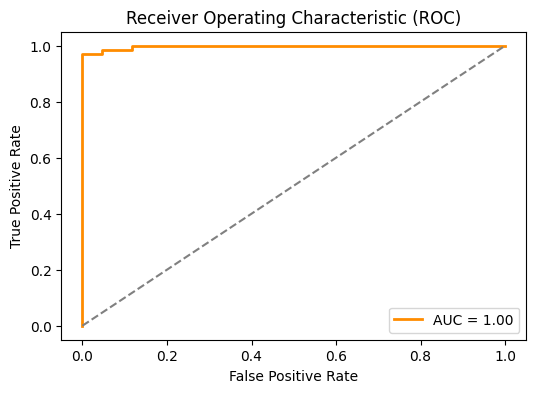

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
